In [2]:
print("Genetic Algorithm- 20225503035- 27|03|2025")

Genetic Algorithm- 20225503035- 27|03|2025


In [4]:
import numpy as np
import random

In [19]:
def distance_between_twopoints(p1,p2):
    return np.sqrt((p1[0] - p2[0])**2+(p1[1] - p2[1])**2)
#this is for the euclidian distance between two points

def total_distance_ofpoints(path, points):
    return sum(distance_between_twopoints(points[path[i]], points[path[i+1]]) for i in range(len(path)-1))

def initialise_pop(size, num_points):
    return [random.sample(range(num_points), num_points) for _ in range(size)]

def fitness (population, points):
    return [1/total_distance_ofpoints(ind,points) for ind in population]

def selection(population, fitness_scores):
    selected= random.choices(population, weights = fitness_scores, k=len(population))
    return selected

def crossover(parent1, parent2):
    size = len(parent1)
    start,end = sorted(random.sample(range(size),2))
    child = [-1] *size
    child[start:end] = parent1[start:end]
    remaining = [item for item in parent2 if item not in child]
    idx = 0
    for i in range(size):
        if child[i] == -1:
            child[i] = remaining[idx]
            idx += 1
            
    return child 

def mutate(individual , mutation_rate =0.1):
    if random.random() < mutation_rate:
        i,j = random.sample(range(len(individual)),2)
        individual[i], individual[j] = individual[j], individual[i]
    return individual

def genetics(points, population_size= 100, generations=500, mutation_rate=0.1):
    num_points = len(points)
    population = initialise_pop(population_size, num_points)
    for _ in range(generations):
        fitness_scores = fitness(population, points)
        population = selection(population, fitness_scores)
        next_generation =[]
        for i in range (0, len(population),2):
            parent1, parent2 = population[i], population[i+1]
            child1, child2 = crossover(parent1, parent2), crossover(parent2, parent1)
            next_generation.extend([mutate(child1,mutation_rate),mutate(child2, mutation_rate)])
        population = next_generation
    best_individual= min(population, key=lambda x:total_distance_ofpoints(x,points))
    return best_individual, total_distance_ofpoints(best_individual, points)

points = [(0,0), (3,5), (7,2), (4,8), (0,0)]

best_path, min_distance = genetics(points)
print("optimised path (index order):", best_path)
print("minimum distance:", min_distance)

optimised path (index order): [0, 4, 2, 1, 3]
minimum distance: 15.442387549448897


In [20]:
import itertools
import numpy as np

# Delivery points
points = {
    'Start': (0, 0),
    'A': (3, 5),
    'B': (7, 2),
    'C': (4, 8)
}

def euclidean_distance(point1, point2):
    """Calculate the Euclidean distance between two points."""
    return np.sqrt((point2[0] - point1[0]) ** 2 + (point2[1] - point1[1]) ** 2)

def total_distance(route):
    """Calculate the total distance of a given route."""
    distance = euclidean_distance(points['Start'], points[route[0]])  # Start to first point
    for i in range(len(route) - 1):
        distance += euclidean_distance(points[route[i]], points[route[i + 1]])  # Between points
    distance += euclidean_distance(points[route[-1]], points['Start'])  # Last point back to Start
    return distance

def brute_force_optimal_route():
    """Find the optimal route using brute-force."""
    delivery_points = ['A', 'B', 'C']
    min_distance = float('inf')
    optimal_route = None
    
    for route in itertools.permutations(delivery_points):
        current_distance = total_distance(route)
        if current_distance < min_distance:
            min_distance = current_distance
            optimal_route = route
            
    return optimal_route, min_distance

# Gradient Descent Placeholder (not suitable for discrete optimization)
def gradient_descent_approximation():
    """A placeholder for a gradient descent approach."""
    # Note: This is not a proper implementation for TSP but serves as an example.
    
    # Randomly initialize positions (for demonstration purposes)
    delivery_points = np.array([[3, 5], [7, 2], [4, 8]])
    
    learning_rate = 0.01
    iterations = 1000
    
    for _ in range(iterations):
        # Calculate distances and gradients (not properly implemented)
        distances = []
        for i in range(len(delivery_points)):
            distances.append(total_distance(['A', 'B', 'C']))  # Placeholder
        
        # Update positions based on some heuristic (not valid for TSP)
        delivery_points -= learning_rate * np.random.rand(*delivery_points.shape)  # Random update
    
    return delivery_points

# Run the brute-force method to find the optimal route
optimal_route, min_distance = brute_force_optimal_route()
print(f"Optimal Route: {optimal_route}")
print(f"Minimum Distance: {min_distance:.2f}")

# Run gradient descent approximation (not effective for TSP)
approx_positions = gradient_descent_approximation()
print("Approximate Positions after Gradient Descent:", approx_positions)


Optimal Route: ('A', 'C', 'B')
Minimum Distance: 22.98


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('float64') to dtype('int32') with casting rule 'same_kind'

Optimal route: ('A', 'C', 'B') with total distance: 22.98
Approximate route (via gradient descent): ['Start', 'A', 'B'] with total distance: 26.48


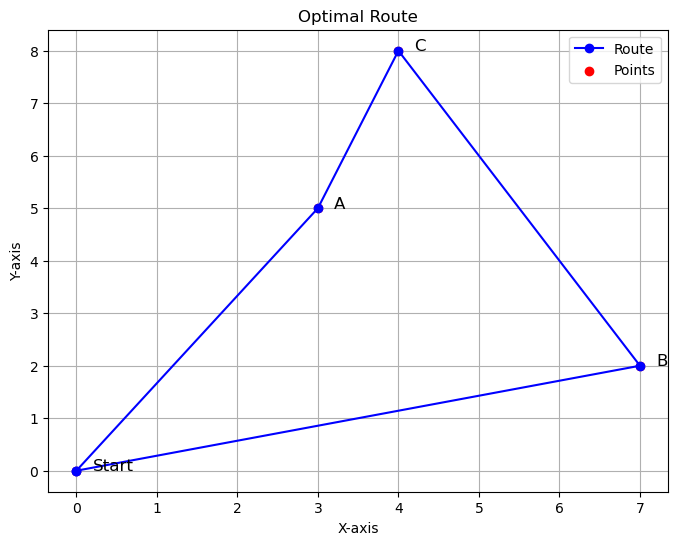

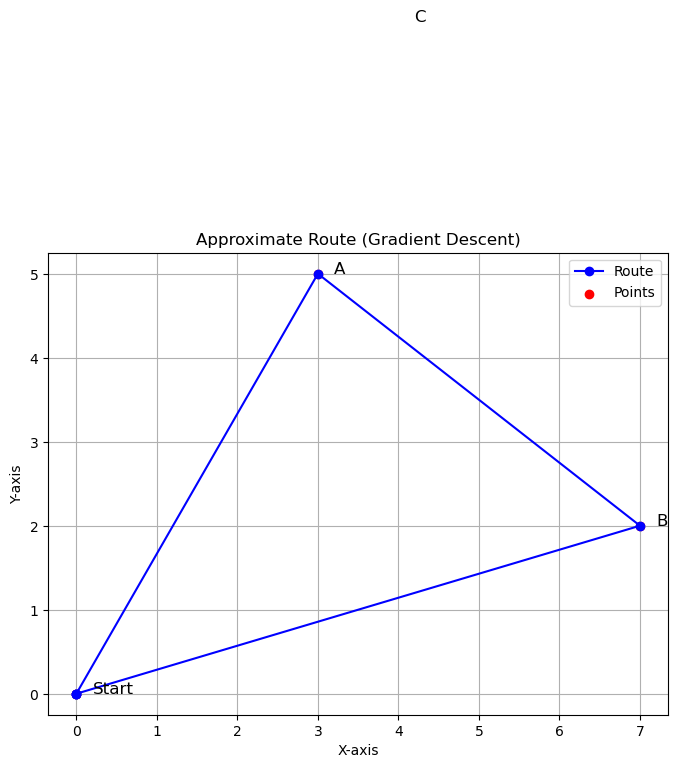

In [27]:
import itertools
import math
import matplotlib.pyplot as plt

# Define the delivery points (including start and end at (0, 0))
points = {
    "Start": (0, 0),
    "A": (3, 5),
    "B": (7, 2),
    "C": (4, 8)
}

# Function to calculate Euclidean distance between two points
def euclidean_distance(p1, p2):
    return math.sqrt((p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2)

# Function to calculate the total distance of a given route
def total_distance(route):
    # Start point is always (0,0)
    route_distance = euclidean_distance(points["Start"], points[route[0]])
    for i in range(len(route) - 1):
        route_distance += euclidean_distance(points[route[i]], points[route[i + 1]])
    route_distance += euclidean_distance(points[route[-1]], points["Start"])  # Return to start
    return route_distance

# Step 1: Calculate the total distance for all possible routes
delivery_points = ["A", "B", "C"]
permutations = itertools.permutations(delivery_points)

# Find the optimal route by checking all permutations
min_distance = float('inf')
optimal_route = None

for perm in permutations:
    distance = total_distance(perm)
    if distance < min_distance:
        min_distance = distance
        optimal_route = perm

print(f"Optimal route: {optimal_route} with total distance: {min_distance:.2f}")

# Step 2: Gradient Descent Approximation (this is an approximation for TSP)
# Simple simulated gradient descent to adjust the route (for illustration purposes)
def gradient_descent_approximation(points, delivery_points, learning_rate=0.1, iterations=100):
    # Convert points to a list of coordinates for optimization
    coordinates = [points[point] for point in delivery_points]
    
    # Function to compute total distance
    def total_distance_gradient(coords):
        route_distance = euclidean_distance((0, 0), coords[0])
        for i in range(len(coords) - 1):
            route_distance += euclidean_distance(coords[i], coords[i + 1])
        route_distance += euclidean_distance(coords[-1], (0, 0))  # Return to start
        return route_distance

    # Perform gradient descent (this is very simplified and not optimal for TSP)
    for _ in range(iterations):
        for i in range(len(coordinates) - 1):
            # Swap two points to simulate an approximation of TSP optimization
            coordinates[i], coordinates[i + 1] = coordinates[i + 1], coordinates[i]
            new_distance = total_distance_gradient(coordinates)
            if new_distance < total_distance_gradient(coordinates):
                break
            # Undo swap if not beneficial
            coordinates[i], coordinates[i + 1] = coordinates[i + 1], coordinates[i]
        
    # Output the approximate solution from gradient descent
    approx_route = [list(points.keys())[i] for i in range(len(coordinates))]
    approx_distance = total_distance_gradient(coordinates)
    return approx_route, approx_distance

# Using gradient descent for an approximation (this may not be the best for TSP)
approx_route, approx_distance = gradient_descent_approximation(points, delivery_points)
print(f"Approximate route (via gradient descent): {approx_route} with total distance: {approx_distance:.2f}")

# Visualization function
def plot_route(route, title="Route Visualization"):
    # Prepare the list of coordinates (including start and end)
    route_coords = [points["Start"]] + [points[point] for point in route] + [points["Start"]]
    route_x = [coord[0] for coord in route_coords]
    route_y = [coord[1] for coord in route_coords]

    # Plot the points and the route
    plt.figure(figsize=(8, 6))
    plt.plot(route_x, route_y, marker='o', linestyle='-', color='b', label='Route')
    plt.scatter(*zip(*[points["Start"]] + [points[point] for point in route]), color='r', label='Points')
    
    # Label the points
    for point, coord in points.items():
        plt.text(coord[0] + 0.2, coord[1], point, fontsize=12)

    # Adding title and labels
    plt.title(title)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.grid(True)
    plt.legend()
    plt.show()

# Step 3: Plot the optimal route
plot_route(optimal_route, title="Optimal Route")

# Step 4: Plot the approximate route from gradient descent
plot_route(approx_route, title="Approximate Route (Gradient Descent)")
